# Comment Processing 02

### Comment Type

After successfully counting the amount of comments we saw that it would be useful to determine the type of comment.
Here we want to determine the type of comment and if it is a reaction by a party we want to adress the reactions to the parties.

---


In [1]:
import pandas as pd
from util.getComments import getComments
from util.countApplause import countApplause
from collections import Counter
import matplotlib.pyplot as plt
from tueplots import bundles


In [2]:
%store -r dataExtracted
dataExtracted: pd.DataFrame


In [3]:
# Increase the resolution of all the plots below
plt.rcParams.update({"figure.dpi": 150})
# Use neurips style
plt.rcParams.update(bundles.neurips2021())


In [4]:
comments = getComments(dataExtracted)


First try: get most used words:


In [5]:
wordsInComments = " ".join(comments).split()
mostCommonWords = Counter(wordsInComments).most_common(100)
df = pd.DataFrame(mostCommonWords, columns=["word", "count"])
df


,word,count
0,der,417
1,bei,328
2,(Beifall,255
3,Abgeordneten,121
4,sowie,101
...,...,...
95,Herr,3
96,Dietmar,3
97,Bartsch,3
98,noch,3


Those are not really useful. We really want the keyword that are at the start of a comment block.


In [6]:
firstWords = [c.split()[0][1:] for c in comments]
mostCommonFirstWords = Counter(firstWords).most_common(10)
df = pd.DataFrame(mostCommonFirstWords, columns=["word", "count"])
df


,word,count
0,Beifall,255
1,Martin,12
2,Zuruf,10
3,Carsten,7
4,Lachen,6
5,Widerspruch,6
6,Jan,6
7,Dr.,5
8,Michael,5
9,Zurufe,3


OK, we can see there is mostly "Beifall" (applause).

("Zuruf(e)", "Lachen" and "Widerspruch" do also exist but are not very prevalent)

To see who is applauding we need to try to interpret these sentences.
(luckily they are always written the same way)


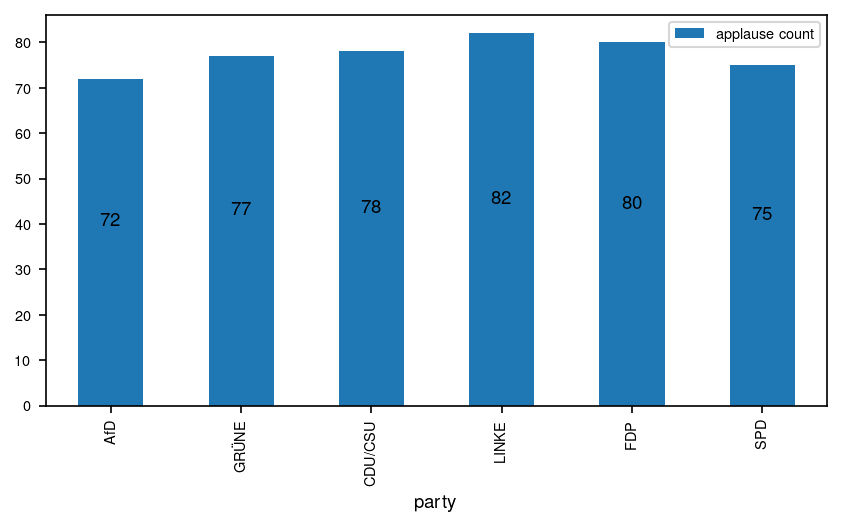

In [7]:
applauseDF = countApplause(comments)

# print with numbers
ax = applauseDF.plot.bar(x="party", y="applause count")
for p in ax.patches:
    ax.annotate(p.get_height(),
                (p.get_x()+p.get_width()/2., p.get_height()/2),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
